# Báo cáo đồ án môn "Khoa học dữ liệu ứng dụng"

Nhóm 4:
1. 1712615 - Nguyễn Trọng Nghĩa - [GitHub](https://github.com/nguyentrongnghia142)
2. 1712683 - Phạm Hoàng Phương - [Github](https://github.com/superman19993)
3. 1712584 - Nguyễn Công Lý - [GitHub](https://github.com/conglyne222)
4. [MSSV] - [Họ tên] - [Nick Github]

Link thùng chứa Github của nhóm: [Repo](https://github.com/nguyentrongnghia142/CommonLit-Readability-Prize)

## Mô tả bài toán
[Bài toán](https://www.kaggle.com/c/commonlitreadabilityprize/overview)

Cần mô tả rõ ràng để người đọc có thể hiểu được chính xác bài toán mà nhóm muốn giải quyết (trong mục này cũng cần để link Kaggle tương ứng với bài toán).

### Sơ bộ về bài toán
### Bối cảnh:


* Đọc là một kỹ năng cần thiết để thành công trong học tập, Khi học sinh tiếp cận được những đoạn văn với mức độ thách thức phù hợp, chúng sẽ phát triển kỹ năng đọc một cách tự nhiên.

* CommonLit là một tổ chức phi lợi nhuận phục vụ hơn 20 tr giáo viên và học sinh với các bài học đọc và viết kĩ thuật số miễn phí cho các lớp 3-12, cùng với đại học bang Georgia, một trường đại học nghiên cứu ở Atlanta, đã tổ chức 1 cuộc thi nhằm cải thiện phương pháp đánh giá khả năng đọc.

### Nội dung:


*   Trong cuộc thị này, người tham gia sẽ xây dựng các thuật toán để đánh giá mức độ phức tạp của việc đọc các đoạn văn để sử dụng trong lớp học từ lớp 3-12. Để đạt được điều này, phải kết hợp kĩ năng học máy của họ để làm việc với 1 tập dữ liệu bao gồm người độc từ nhiều nhóm tuổi khác nhau với một số lượng lớn các văn bản thuộc nhiều lĩnh vực khác nhau.


*   Nếu thành công, bạn đã hỗ trợ các giáo viên và sinh viên, các nhà phát triền chương trình giảng dạy đọc viết có thể đánh giá nhanh chóng và chính xác các tài liệu trong lớp học của họ. Quan trọng nhất, học sinh sẽ được hưởng lợi từ việc đánh giá độ phức tạp và khả năng đọc của họ, giúp họ cải thiện các kỹ năng đọc thiết yếu dễ dàng hơn nhiều.

### Đánh giá:

-	Các bài dự thi sẽ được đánh giá dựa trên độ lỗi RMSE: ![image.png](https://scontent.fdad1-1.fna.fbcdn.net/v/t1.15752-9/258845405_591261328774655_4260656527898854926_n.png?_nc_cat=109&ccb=1-5&_nc_sid=ae9488&_nc_ohc=JcFQuPsmYnYAX-OYyFs&_nc_ht=scontent.fdad1-1.fna&oh=491e243d6da6d57179a18d30529a8466&oe=61BF2150)


### Submission file:
-	Với mỗi dòng trong tập test, cần phải dự đoán giá trị của target, tệp phải chứa tiêu đề và có định dạng sau: 
![image.png](https://scontent.fdad1-2.fna.fbcdn.net/v/t1.15752-9/254632714_433915911583493_5614680366254606947_n.png?_nc_cat=102&ccb=1-5&_nc_sid=ae9488&_nc_ohc=omTcknGdud8AX8hu4Fv&_nc_ht=scontent.fdad1-2.fna&oh=9ad8860d2bb51f4ab489fecd599a056d&oe=61BECC2F)


### Dataset: 
-	Cột:
1. 	Id:  mã id của đoạn trích (unique)
2.   url_legal: đường dẫn của đoạn trích- trường này có thể trống trong tập test
3.   license: bản quyền của đoạn trích- trường này có thể trống trong tập test
4.   excerpt: nội dung đoạn trích cần dự đoán độ dễ đọc
5.   target: độ dễ của đoạn trích
6.   standard_error: thước đo chênh lệch điểm số giữa nhiều người đánh giá cho mỗi đoạn trích. Không được bao gồm trong tập test.





## Giải quyết bài toán
[Giải pháp](https://www.kaggle.com/c/commonlitreadabilityprize/discussion/258148)

Đầu tiên, nhóm bạn cần nói rõ là: trong đồ án này, nhóm tìm hiểu và cài đặt lại (và cải tiến?) một phương pháp giải quyết đã có (cần để link tương ứng, cũng cần nói là phương pháp này đứng thứ mấy trong private leaderboard). Nhóm bạn cũng cần giải thích một xíu để người đọc hiểu là tại sao nhóm bạn lại chọn phương pháp giải quyết này trong số nhiều phương pháp giải quyết. 

Mục này sẽ rất dài nên có lẽ là nhóm bạn sẽ cần suy nghĩ để chia thành các mục con. Nhóm bạn cần đặt tiêu đề cho các mục con sao cho khi người đọc nhìn vào các tiêu đề này là sẽ hiểu được "flow" mà nhóm định trình bày.

Với mỗi mục, luôn luôn trình bày *ý tưởng chính* trước khi trình bày chi tiết. Bằng cách này:
- Nếu người đọc không có thời gian đọc chi tiết (hoặc đọc nhưng không hiểu hoàn toàn) thì vẫn có thể nắm được ý tưởng chính. 
- Khi nhóm bạn thuyết trình (nhóm bạn sẽ dùng file notebook này để thuyết trình luôn, chứ không cần phải soạn thêm slide), nhóm bạn có thể chỉ trình bày phần ý tưởng chính (vì thời gian thuyết trình là có hạn); có thể dùng chức năng "collapse sections" của Google Colab (hoặc chức năng tương tự của Jupyter Notebook/Lab) để dấu phần chi tiết đi, chỉ khi người nghe hỏi thì mới mở ra để trình bày.

Viết viết lách và code sao cho người khác dễ theo dõi là một kỹ năng được tập trung rèn luyện trong đồ án này. 

Ở phần code, nhóm bạn cũng cần nói rõ là: để chạy được các code cell ở bên dưới thì đầu tiên cần phải download các file dữ liệu ở đâu và đặt các file dữ liệu này ở thư mục nào (nếu được thì nhóm bạn cũng có thể tự động hóa vụ này bằng cách viết một đoạn code để check xem đã có các file dữ liệu chưa, nếu chưa có thì sẽ tự động download xuống).

Trong đồ án này, nhóm tìm hiểu và cài đặt lại 1 phương pháp giải quyết đã có: [Giải pháp](https://www.kaggle.com/c/commonlitreadabilityprize/discussion/258148)

Phương pháp trên được xếp hạng 4 trong private leaderboard của cuộc thi.

### Sơ bộ về cách giải quyết bài toán:
🏅️ 4th Place Solution (0.447) 🏅️

Some brief descriptions goes here

## Phương thức Ensemble:
Tác giá sử dụng 3 phương pháp chính cho Ensembling:
* **1. RidgeCV**

* **2. BayesianRidgeRegression**:

Là 1 trong 3 phương pháp chính cho phương thức ensembling:
BayesianRidge ước tính mô hình xác suất cho các bài toán hồi quy. 

BayesianRidge cho phép 1 cơ chế tự nhiên để tồn tại dữ liệu không hiệu quả hoặc dữ liệu được phân phối kém bằng cách xây dựng hồi quy tuyến tính sử dụng phân phối xác suất thay vì ước lượng điểm.

Một trong những loại Hồi quy Bayesian hiệu quả là Bayesian Ridge Regression, ước tính mô hình xác suất cho các bài toán hồi quy. Công thức:
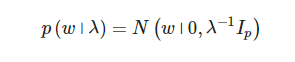

LOOCV là một phương pháp Cross Validation: Chia tập dữ liệu thành K tập con (K = số dữ liệu)

## EDA (tìm hiểu dữ liệu)

In [ ]:
!ls
import pandas as pd
from collections import Counter
from pathlib import Path

INPUT_PATH = Path(f"sample_data")
for child in INPUT_PATH.iterdir():
    print(child)

sample_data
sample_data/anscombe.json
sample_data/README.md
sample_data/train.csv
sample_data/mnist_train_small.csv
sample_data/california_housing_train.csv
sample_data/california_housing_test.csv
sample_data/mnist_test.csv


In [ ]:
df = pd.read_csv(INPUT_PATH / "train.csv")
df.head()

,id,url_legal,license,excerpt,target,standard_error
0,c12129c31,NaN,NaN,When the young people returned to the ballroom...,-0.340259,0.464009
1,85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805
2,b69ac6792,NaN,NaN,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676
3,dd1000b26,NaN,NaN,And outside before the palace a great garden w...,-1.054013,0.450007
4,37c1b32fb,NaN,NaN,Once upon a time there were Three Bears who li...,0.247197,0.510845


In [ ]:
df.describe()

,target,standard_error
count,2834.000000,2834.000000
mean,-0.959319,0.491435
std,1.033579,0.034818
min,-3.676268,0.000000
25%,-1.690320,0.468543
50%,-0.912190,0.484721
75%,-0.202540,0.506268
max,1.711390,0.649671


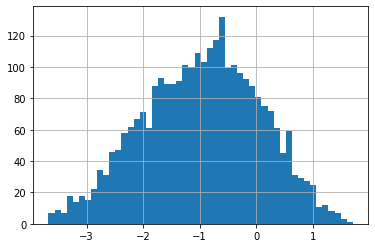

In [ ]:
df["target"].hist(bins=50);

In [ ]:
str(df.loc[0, "excerpt"])

'When the young people returned to the ballroom, it presented a decidedly changed appearance. Instead of an interior scene, it was a winter landscape.\nThe floor was covered with snow-white canvas, not laid on smoothly, but rumpled over bumps and hillocks, like a real snow field. The numerous palms and evergreens that had decorated the room, were powdered with flour and strewn with tufts of cotton, like snow. Also diamond dust had been lightly sprinkled on them, and glittering crystal icicles hung from the branches.\nAt each end of the room, on the wall, hung a beautiful bear-skin rug.\nThese rugs were for prizes, one for the girls and one for the boys. And this was the game.\nThe girls were gathered at one end of the room and the boys at the other, and one end was called the North Pole, and the other the South Pole. Each player was given a small flag which they were to plant on reaching the Pole.\nThis would have been an easy matter, but each traveller was obliged to wear snowshoes.'

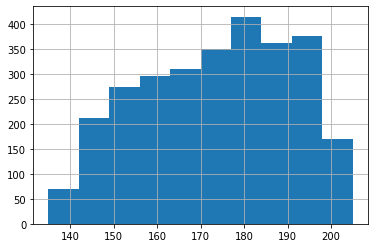

In [ ]:
df["word_count"] = df['excerpt'].str.split().apply(len)
df["word_count"].hist();

In [ ]:
df["url_legal"].value_counts()

https://www.africanstorybook.org/                                118
https://www.africanstorybook.org/#                                46
https://simple.wikipedia.org/wiki/Voltage                          2
https://simple.wikipedia.org/wiki/Electron_crystallography         1
https://simple.wikipedia.org/wiki/Liquid_crystal_display           1
                                                                ... 
https://simple.wikipedia.org/wiki/Nanotechnology                   1
https://kids.frontiersin.org/article/10.3389/frym.2017.00022       1
https://simple.wikipedia.org/wiki/Marshall_Plan                    1
https://en.wikibooks.org/wiki/Wikijunior:The_Elements/Liquids      1
https://simple.wikipedia.org/wiki/Hard_disk                        1
Name: url_legal, Length: 667, dtype: int64

## Nhìn lại quá trình làm đồ án

Sau bao ngày vất vả làm đồ án thì bây giờ đã kết thúc. Bây giờ là lúc để ngồi uống coffee và tĩnh tâm nhìn lại quá trình làm.

- Mỗi thành viên: Đã gặp những khó khăn gì? (Hay mọi chuyện đều thuận lợi)
- Mỗi thành viên: Có học được gì hữu ích? (Hay không học được gì)
- Nhóm: Nếu có thêm thời gian thì sẽ làm gì?

Phần này có sao thì bạn nói vậy thôi, chứ không phải là viết
cho có, hoặc tự chế ra để nghe cho hay.

## Tài liệu tham khảo

Để hoàn thành đồ án này, nhóm bạn đã tham khảo những tài liệu nào?